# Setup

Import common modules. Ensure that Python and Scikit-Learn in proper versions are used.

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Download Data

In [2]:
import os
import tarfile
from urllib import request

DATA_DIR = "data"
COUNTRY_CODE_URL = "https://raw.githubusercontent.com/datasets/country-codes/master/data/country-codes.csv"

def fetch_countries_codes(country_code_url=COUNTRY_CODE_URL, data_dir=DATA_DIR):
    if not os.path.isdir(data_dir):
        os.makedirs(data_dir)
    response = request.urlretrieve(country_code_url, os.path.join(DATA_DIR, "country-codes.csv"))
 

In [3]:
fetch_countries_codes()

os.listdir("./data")

['.DS_Store', 'owid', 'country-codes.csv', 'nasa']

# Load Data

In [4]:
import pandas as pd

DATASET_PATH = "./data"
OWID_DATASETS = os.path.join(DATASET_PATH, "owid")
CO2_EMISSION_CSV_PATH = os.path.join(OWID_DATASETS, "owid-co2-data.csv")
COUNTRY_CODE_CSV_PATH = os.path.join(DATASET_PATH, "country-codes.csv")

co2_emission = pd.read_csv(CO2_EMISSION_CSV_PATH)
country_codes = pd.read_csv(COUNTRY_CODE_CSV_PATH)
country_codes

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3,AL,AB,AL,...,Southern Europe,Албания,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4,AG,AL,DZ,...,Northern Africa,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5,AQ,,AS,...,Polynesia,Американское Самоа,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SAH,212,ESH,ss,In contention,732.0,268,WI,,EH,...,Northern Africa,Западная Сахара,World,El-Aaiun,AF,.eh,"ar,mey",2461445.0,Western Sahara,U5
246,YEM,967,YEM,ye,Yes,887.0,269,YM,YE,YE,...,Western Asia,Йемен,World,Sanaa,AS,.ye,ar-YE,69543.0,Yemen,T7
247,ZAM,260,ZMB,za,Yes,894.0,270,ZA,ZB,ZM,...,Sub-Saharan Africa,Замбия,World,Lusaka,AF,.zm,"en-ZM,bem,loz,lun,lue,ny,toi",895949.0,Zambia,Y4
248,ZIM,263,ZWE,rh,Yes,716.0,271,ZI,ZW,ZW,...,Sub-Saharan Africa,Зимбабве,World,Harare,AF,.zw,"en-ZW,sn,nr,nd",878675.0,Zimbabwe,Y5


# Quick take a look at the data

In [5]:
co2_emission.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

# Clearing country codes dataset

In [7]:
country_codes = country_codes.dropna(subset=['ISO3166-1-numeric'])
country_codes = country_codes.astype({'ISO3166-1-numeric':'int'})
country_codes

country_iso_codes = country_codes.rename(columns = {'ISO3166-1-numeric': 'iso_code_numeric', 'ISO3166-1-Alpha-3': 'iso_code', 'Sub-region Name': 'sub_region', 'Continent': 'continent'})
country_iso_codes = country_iso_codes[['iso_code', 'iso_code_numeric', 'continent']]
country_iso_codes.head(5)

,iso_code,iso_code_numeric,continent
0,TWN,158,AS
1,AFG,4,AS
2,ALB,8,EU
3,DZA,12,AF
4,ASM,16,OC


# Enrich co2 emission dataset with numeric code

In [8]:
world_co2_emission = pd.merge(left=co2_emission, right=country_iso_codes, on='iso_code', how='left')
world_co2_emission = world_co2_emission.dropna(subset=['iso_code_numeric'])
world_co2_emission = world_co2_emission.astype({'iso_code_numeric':'int'})


# C02 emission in 1800, 1850, 1900, 1950, 2000, 2020 by country

In [ ]:
import altair as alt
import janitor
import pandas as pd
from vega_datasets import data

def world_co2_emission_in_year(co2_emission, year):
    return world_co2_emission.loc[world_co2_emission['year'] == year]


world_source = world_co2_emission_in_year(world_co2_emission, 2000)
source = alt.topo_feature(data.world_110m.url, "countries")
background = alt.Chart(source).mark_geoshape(fill="#ececec")

charts = []
for i in [1800, 1850, 1900, 1950, 2000, 2020]:    
    foreground = (
        alt.Chart(source).mark_geoshape(
            stroke="black", strokeWidth=0.15
        ).encode(
            color=alt.Color('co2:Q'),
            tooltip=[
                alt.Tooltip("country:N", title="Country"),
                alt.Tooltip("co2:Q", title="C02 emission"),
            ],
        ).transform_lookup(
            lookup="id",
            from_=alt.LookupData(world_co2_emission_in_year(world_co2_emission, i), "iso_code_numeric", ["co2", "country"]),
        )
    )

    chart = (
        (background + foreground)
        .properties(width=400, height=250)
        .project("naturalEarth1")
    )
    charts.append(chart)

alt.concat(*charts, columns=2)


alt.ConcatChart(...)

# C02 emission since 1750 by region

In [10]:
import altair as alt
from vega_datasets import data

# label top co2 emission countries and the rest by continent
def label_region(row):
    country = row['country']
    continent = row['continent']
    if (country in ['United States', 'China', 'India', 'Russia']):
        return country
    elif (continent == 'AF'):
        return 'Africa'
    elif (continent == 'AS'):
        return 'Asia'
    elif (continent == 'EU'):
        return 'Europe'
    elif (continent == 'OC'):
        return 'Oceania'
    elif (continent == 'AN'):
        return 'Antarctica'
    elif (continent == 'NA'):
        return 'North America'
    elif (continent == 'SA'):
        return 'South America'
    else:
        return None

    
world_co2_emission_by_region = world_co2_emission[['country', 'year', 'co2', 'continent']]
world_co2_emission_by_region['region'] = world_co2_emission_by_region.apply(lambda row: label_region(row), axis = 1)
world_co2_emission_by_region = world_co2_emission_by_region.drop(['country', 'continent'], axis = 1)
world_co2_emission_by_region_by_year = world_co2_emission_by_region.dropna().groupby(['year', 'region']).sum().reset_index()
world_co2_emission_by_region_by_year

alt.Chart(world_co2_emission_by_region_by_year).mark_line().encode(
    x='year',
    y='co2:Q',
    color='region:N',
)


/var/folders/p3/7xlmsjkd7hggrkvvtvd9dwy80000gn/T/ipykernel_4654/1854029140.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_co2_emission_by_region['region'] = world_co2_emission_by_region.apply(lambda row: label_region(row), axis = 1)


alt.Chart(...)

# C02 emission correlation

Is there any correlation between _population_, _gdp_ and _co2 emission_?

array([[<AxesSubplot: xlabel='population', ylabel='population'>,
        <AxesSubplot: xlabel='gdp', ylabel='population'>,
        <AxesSubplot: xlabel='co2', ylabel='population'>],
       [<AxesSubplot: xlabel='population', ylabel='gdp'>,
        <AxesSubplot: xlabel='gdp', ylabel='gdp'>,
        <AxesSubplot: xlabel='co2', ylabel='gdp'>],
       [<AxesSubplot: xlabel='population', ylabel='co2'>,
        <AxesSubplot: xlabel='gdp', ylabel='co2'>,
        <AxesSubplot: xlabel='co2', ylabel='co2'>]], dtype=object)

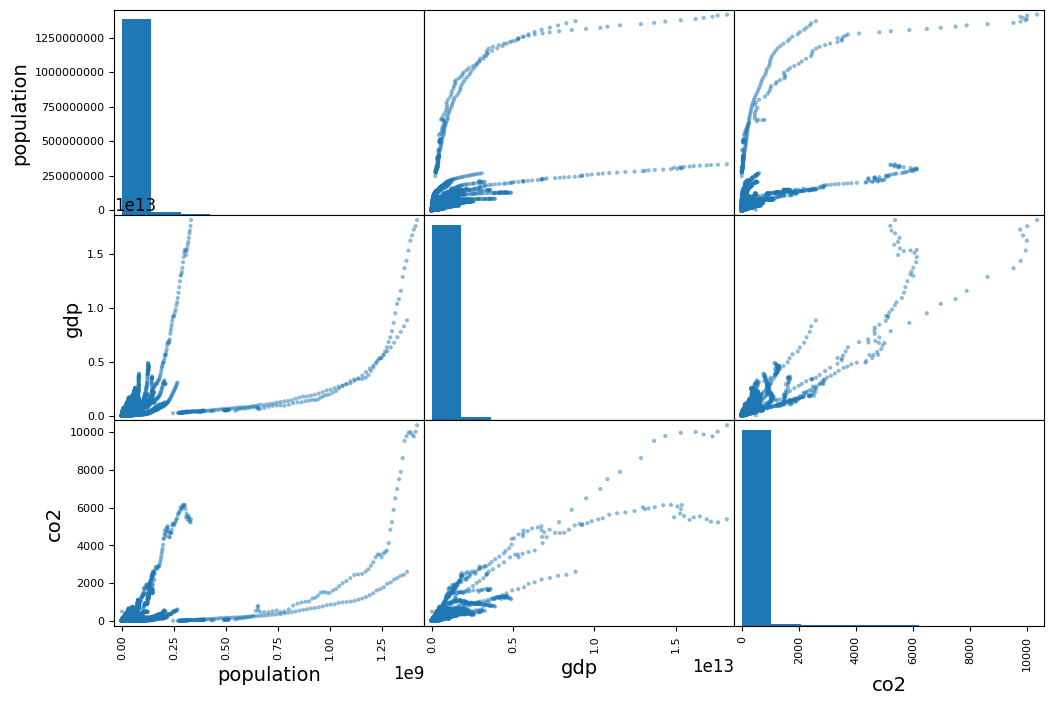

In [11]:
from pandas.plotting import scatter_matrix

world_co2_emission_by_population_dgp = world_co2_emission[['population', 'gdp', 'co2']].dropna()
attributes = ['population', "gdp", "co2"]
scatter_matrix(world_co2_emission_by_population_dgp[attributes], figsize=(12,8))

Correlation between _gdp_ and _co2_ emission looks promissing. Let's see it in more details.

<AxesSubplot: xlabel='gdp', ylabel='co2'>

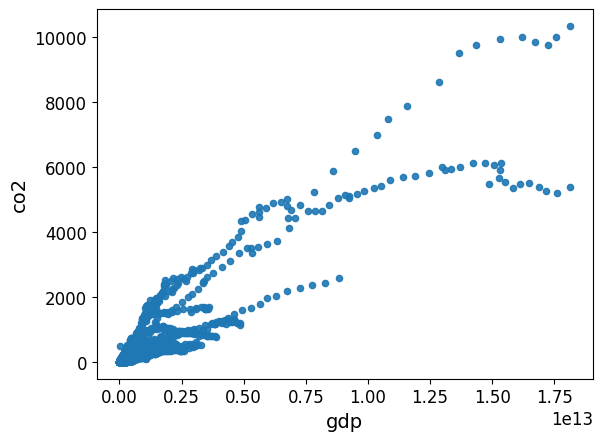

In [12]:
world_co2_emission_by_population_dgp.plot(kind = "scatter", x = "gdp", y = "co2", alpha=0.9)

To make sure plot is interpreted correclty let's calculate Pearson's correlation between. 

In [13]:
world_co2_emission_by_population_dgp.corr()

,population,gdp,co2
population,1.000000,0.587208,0.597836
gdp,0.587208,1.000000,0.922921
co2,0.597836,0.922921,1.000000


Indeed, _co2_ and _gdp_ have correlation close to `1`
(x)[https://www.frontiersin.org/articles/10.3389/fenvs.2022.934885/full]
